# DS 3000 - Assignment 5 (Group Practicum 1)

**Student Name**: Group 34

**Date**: 9/26/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 — The DS Problem

In your own words, explain the Data Science problem that you were given.

## Question 2 — Prepare the Data (10 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

In [2]:
# importing data into a dataframe
df = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')
df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,750.0,0.0,911.0,0.0,81.0,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,1855.0,0.0,2148.0,0.0,353.0,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,802.0,2.0,1128.0,0.0,386.0,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,604.0,0.0,802.0,0.0,118.0,550


In [3]:
# removing duplicate data rows from the dataframe
df.drop_duplicates(inplace=True)
# seeing how many rows remain in the dataframe
df.shape[0]

1897503

In [4]:
# there were no duplicate rows removed

In [5]:
# checking frequency of missing values of columns
df.isnull().sum()

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

In [6]:
# indentifying the maximum number of missing variables in a row
df.isnull().sum(axis=1).sort_values(ascending = False)

33745      6
1369812    6
1163400    6
717776     6
461086     6
          ..
636507     0
636506     0
636504     0
636503     0
1897502    0
Length: 1897503, dtype: int64

In [7]:
# There are at maximum 6 variables missing at once from a row
# looking at one of the rows where all six variables are missing
df.loc[33745]

FL_DATE         2019-10-07
CARRIER_CODE            UA
TAIL_NUM               NaN
FL_NUM                 207
ORIGIN                 BOS
ORIGIN_ST               MA
DEST                   SFO
DEST_ST                 CA
DEP_TIME               NaN
DEP_DELAY              NaN
ARR_TIME               NaN
ARR_DELAY              NaN
ELAPSED_TIME           NaN
DISTANCE              2704
Name: 33745, dtype: object

This looks to be a widespread issue meaning that the best method to handle this missing data is deletion. I will remove all rows with NaN in the ELAPSED_TIME column as that is the highest column with the most number of variables deleted, tied with the ARR_DELAY column. 

In [8]:
# should removed 31884 rows where there was a NaN value in the ELAPSED_TIME col
df = df.drop(df[df['ELAPSED_TIME'].isnull()].index)
df.shape[0]

1865619

In [9]:
# orginal number of rows minus the new number of rows should equate to 31884
1897503-1865619

31884

In [10]:
# showing data type and non-null count of each variable in the dataframe
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   FL_DATE       1865619 non-null  object 
 1   CARRIER_CODE  1865619 non-null  object 
 2   TAIL_NUM      1865619 non-null  object 
 3   FL_NUM        1865619 non-null  int64  
 4   ORIGIN        1865619 non-null  object 
 5   ORIGIN_ST     1865619 non-null  object 
 6   DEST          1865619 non-null  object 
 7   DEST_ST       1865619 non-null  object 
 8   DEP_TIME      1865619 non-null  float64
 9   DEP_DELAY     1865619 non-null  float64
 10  ARR_TIME      1865619 non-null  float64
 11  ARR_DELAY     1865619 non-null  float64
 12  ELAPSED_TIME  1865619 non-null  float64
 13  DISTANCE      1865619 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 213.5+ MB


All null rows were removed with the removal of NaN values from ELAPSED_TIME as the issue was widespread throughout the data. 

When looking at the variables represented in the dataframe, one can see that all categorical variables (CARRIER_CODE, TAIL_NUM, ORIGIN, ORIGIN_ST, DEST, DEST_ST) are of the object type, so they should be cast to the "category" type.

In [11]:
df['CARRIER_CODE'] = df['CARRIER_CODE'].astype('category')
df['TAIL_NUM'] = df['TAIL_NUM'].astype('category')
df['ORIGIN'] = df['ORIGIN'].astype('category')
df['ORIGIN_ST'] = df['ORIGIN_ST'].astype('category')
df['DEST'] = df['DEST'].astype('category')
df['DEST_ST'] = df['DEST_ST'].astype('category')

# checking the data types to make sure they are updated 
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   FL_DATE       1865619 non-null  object  
 1   CARRIER_CODE  1865619 non-null  category
 2   TAIL_NUM      1865619 non-null  category
 3   FL_NUM        1865619 non-null  int64   
 4   ORIGIN        1865619 non-null  category
 5   ORIGIN_ST     1865619 non-null  category
 6   DEST          1865619 non-null  category
 7   DEST_ST       1865619 non-null  category
 8   DEP_TIME      1865619 non-null  float64 
 9   DEP_DELAY     1865619 non-null  float64 
 10  ARR_TIME      1865619 non-null  float64 
 11  ARR_DELAY     1865619 non-null  float64 
 12  ELAPSED_TIME  1865619 non-null  float64 
 13  DISTANCE      1865619 non-null  int64   
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 144.3+ MB


We can convert the DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, and ELAPSED_TIME into datetime values.

Before we do this however we need to check that all the values in the columns we're going to convert to datetime have integer values since we need to convert the floats to integers during the datetime conversion.

In [12]:
def check_all_values_int_like(colname):
    num_non_integers = df[colname].apply(lambda x: not x.is_integer() if pd.notnull(x) else False).sum()
    print(f'{colname}: {num_non_integers}')

cols_to_convert = ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME']
print("Number of non-integer values per column:")
for col in cols_to_convert:
    check_all_values_int_like(col)

Number of non-integer values per column:
DEP_TIME: 0
DEP_DELAY: 0
ARR_TIME: 0
ARR_DELAY: 0
ELAPSED_TIME: 0


As we can see all columns have integer values.

The columns DEP_TIME and ARR_TIME can be turned into datetime values by turning the integers into a time, e.g. 823 -> 08:23

In [13]:
def time_float_to_time_string(time_float):
    time_int_str = str(int(time_float)).zfill(4)
    hours, minutes = (time_int_str[:len(time_int_str)//2], time_int_str[len(time_int_str)//2:])
    hours = '00' if hours == '24' else hours
    return hours + ':' + minutes

df['DEP_TIME'] = pd.to_datetime(df['DEP_TIME'].apply(time_float_to_time_string), format='%H:%M')
df['ARR_TIME'] = pd.to_datetime(df['ARR_TIME'].apply(time_float_to_time_string), format='%H:%M')

The DEP_DELAY, ARR_DELAY, and ELAPSED_TIME columns have values of type float can be converted to timedelta.

In [14]:
def mins_float_to_time_string(mins_float):
    mins_int = int(mins_float)
    hours, minutes = divmod(mins_int, 60)
    return f'{hours:02}:{minutes:02}:00'

df['DEP_DELAY'] = pd.to_timedelta(df['DEP_DELAY'].apply(mins_float_to_time_string))
df['ARR_DELAY'] = pd.to_timedelta(df['ARR_DELAY'].apply(mins_float_to_time_string))
df['ELAPSED_TIME'] = pd.to_timedelta(df['ELAPSED_TIME'].apply(mins_float_to_time_string))

In [15]:
# checking the data types to make sure they are updated
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype          
---  ------        --------------    -----          
 0   FL_DATE       1865619 non-null  object         
 1   CARRIER_CODE  1865619 non-null  category       
 2   TAIL_NUM      1865619 non-null  category       
 3   FL_NUM        1865619 non-null  int64          
 4   ORIGIN        1865619 non-null  category       
 5   ORIGIN_ST     1865619 non-null  category       
 6   DEST          1865619 non-null  category       
 7   DEST_ST       1865619 non-null  category       
 8   DEP_TIME      1865619 non-null  datetime64[ns] 
 9   DEP_DELAY     1865619 non-null  timedelta64[ns]
 10  ARR_TIME      1865619 non-null  datetime64[ns] 
 11  ARR_DELAY     1865619 non-null  timedelta64[ns]
 12  ELAPSED_TIME  1865619 non-null  timedelta64[ns]
 13  DISTANCE      1865619 non-null  int64          
dtypes: category(6), datetime64[ns](2), int6

The last data type to be addressed is the first column, the FL_DATE column. This column would best be represented by being represented as a DateTime variable in the data frame. This is a quick fix which will be taken care of in the following code.

In [16]:
# convert 'FL_DATE' to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [17]:
# checking the data types to make sure they are updated 
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype          
---  ------        --------------    -----          
 0   FL_DATE       1865619 non-null  datetime64[ns] 
 1   CARRIER_CODE  1865619 non-null  category       
 2   TAIL_NUM      1865619 non-null  category       
 3   FL_NUM        1865619 non-null  int64          
 4   ORIGIN        1865619 non-null  category       
 5   ORIGIN_ST     1865619 non-null  category       
 6   DEST          1865619 non-null  category       
 7   DEST_ST       1865619 non-null  category       
 8   DEP_TIME      1865619 non-null  datetime64[ns] 
 9   DEP_DELAY     1865619 non-null  timedelta64[ns]
 10  ARR_TIME      1865619 non-null  datetime64[ns] 
 11  ARR_DELAY     1865619 non-null  timedelta64[ns]
 12  ELAPSED_TIME  1865619 non-null  timedelta64[ns]
 13  DISTANCE      1865619 non-null  int64          
dtypes: category(6), datetime64[ns](3), int6

All of the variables have been updated to their correct types and missing data has been handled. It is now time to look for invalid data. 

In [18]:
# showing summary stats of all rows
df.describe(include='all')

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
count,1865619,1865619,1865619,1.865619e+06,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1.865619e+06
unique,NaN,15,4885,NaN,152,43,152,43,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,WN,N706SK,NaN,LAX,CA,LAX,CA,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,543773,1734,NaN,216481,798690,216677,799137,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-07-03 20:16:14.050972416,NaN,NaN,2.043568e+03,NaN,NaN,NaN,NaN,1900-01-01 13:36:44.254501632,0 days 00:13:06.940291667,1900-01-01 14:53:11.603204352,0 days 00:12:43.414330578,0 days 02:54:48.575320041,1.146858e+03
min,2019-01-01 00:00:00,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,0 days 00:00:00,1900-01-01 00:00:00,0 days 00:00:00,0 days 00:26:00,6.600000e+01
25%,2019-04-05 00:00:00,NaN,NaN,7.020000e+02,NaN,NaN,NaN,NaN,1900-01-01 09:13:00,0 days 00:00:00,1900-01-01 10:50:00,0 days 00:00:00,0 days 01:34:00,4.510000e+02
50%,2019-07-05 00:00:00,NaN,NaN,1.633000e+03,NaN,NaN,NaN,NaN,1900-01-01 13:26:00,0 days 00:00:00,1900-01-01 15:17:00,0 days 00:00:00,0 days 02:33:00,9.540000e+02
75%,2019-10-02 00:00:00,NaN,NaN,2.710000e+03,NaN,NaN,NaN,NaN,1900-01-01 17:57:00,0 days 00:08:00,1900-01-01 19:36:00,0 days 00:07:00,0 days 04:04:00,1.744000e+03
max,2019-12-31 00:00:00,NaN,NaN,7.910000e+03,NaN,NaN,NaN,NaN,1900-01-01 23:59:00,1 days 14:35:00,1900-01-01 23:59:00,1 days 15:10:00,0 days 09:12:00,2.979000e+03


In [19]:
# list of states to check against
valid_states = ['CA', 'NV', 'AZ']

# check if values in columns ORIGIN_ST OR DEST_ST are in valid_states list
df['CHECKING_ST'] = df['ORIGIN_ST'].isin(valid_states) | df['DEST_ST'].isin(valid_states)
df['CHECKING_ST'].value_counts()

# drop column since it is only being used here
df.drop(['CHECKING_ST'], axis=1)

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,1900-01-01 08:28:00,0 days 00:00:00,1900-01-01 13:53:00,0 days 00:00:00,0 days 03:25:00,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1900-01-01 19:07:00,0 days 00:00:00,1900-01-01 21:59:00,0 days 00:00:00,0 days 01:52:00,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1900-01-01 19:04:00,0 days 01:44:00,1900-01-01 20:16:00,0 days 01:41:00,0 days 03:12:00,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1900-01-01 17:29:00,0 days 00:04:00,1900-01-01 22:15:00,0 days 00:03:00,0 days 02:46:00,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,1900-01-01 06:56:00,0 days 00:00:00,1900-01-01 08:41:00,0 days 00:00:00,0 days 04:45:00,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,1900-01-01 07:50:00,0 days 00:00:00,1900-01-01 09:11:00,0 days 00:00:00,0 days 01:21:00,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,1900-01-01 18:55:00,0 days 00:00:00,1900-01-01 21:48:00,0 days 00:00:00,0 days 05:53:00,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,1900-01-01 08:02:00,0 days 00:02:00,1900-01-01 11:28:00,0 days 00:00:00,0 days 06:26:00,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,1900-01-01 06:04:00,0 days 00:00:00,1900-01-01 08:02:00,0 days 00:00:00,0 days 01:58:00,550


In [20]:
# each flight in the data either took off or left from one of the states ['CA', 'NV', 'AZ']
# checking if any flights left and landed at the same airport
count = (df['ORIGIN'].astype(str) == df['DEST'].astype(str)).sum()
print(count)

0


In [21]:
# no flights left and landed at the same airport

## Question 3 — (20 points)

Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

Q3.1: We define "the most air traffic" to be the highest number of flights, both arriving and departing. The reason we use this definition is that "air traffic" as a term means the number of aircraft that are airborne in a given airspace at a given time. A good proxy for this is the number of flights arriving to and departing from the region, since the more arrivals and departures there are the more airplanes are in the sky at a time.

<Axes: title={'center': 'Total Arrivals and Departures per State'}, xlabel='State', ylabel='Total Arrivals and Departures'>

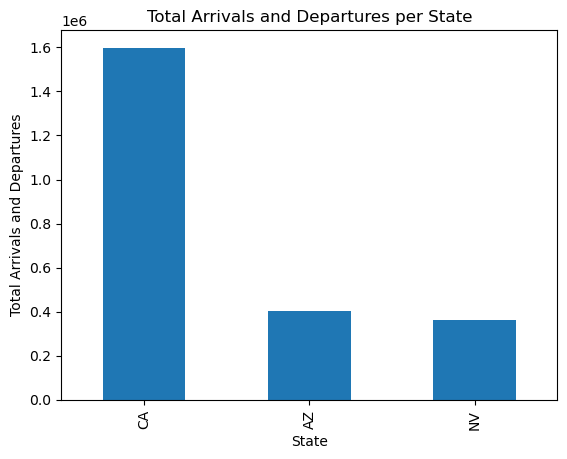

In [22]:
departures = df['ORIGIN_ST'].value_counts()
arrivals = df['DEST_ST'].value_counts()

# combine the counts of departures and arrivals for each state to get total
total_air_traffic = departures.add(arrivals, fill_value=0)

filtered_total_air_traffic = total_air_traffic[total_air_traffic.index.isin(['CA', 'NV', 'AZ'])]
filtered_total_air_traffic.plot(kind='bar', title='Total Arrivals and Departures per State', xlabel='State', ylabel='Total Arrivals and Departures')

As we can see California has the most air traffic by far. It has almost twice as many arrivals and departures as the other two states combined. This is not surprising since California takes in almost all flights coming to the west coast of the US, including international flights crossing the Pacific Ocean as well as some direct flights to Europe which increases its total arrivals and departures.

Q3.2: Now we will look at the most popular inbound/outbound airports in each of the three states.

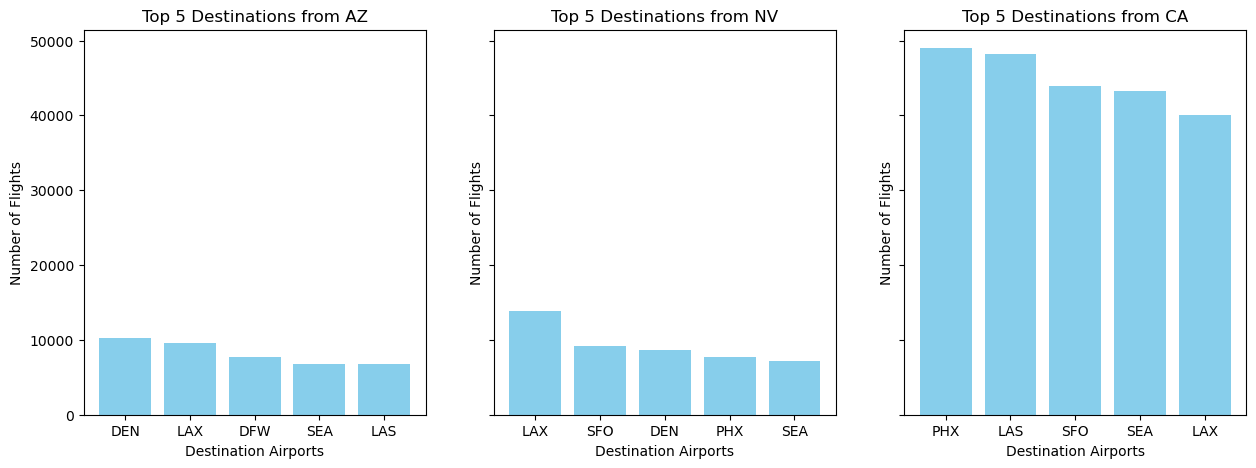

In [23]:
states = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states)]

# Count number of flights to each destination
popular_destinations = (
    filtered_df_states.groupby(['ORIGIN_ST', 'DEST'], observed=True)
    .size()
    .reset_index(name='num_flights')
)

# Get top 5 most popular destinations
top_destinations = popular_destinations.groupby('ORIGIN_ST', observed=True)[['DEST', 'num_flights']].apply(
    lambda x: x.nlargest(5, 'num_flights')
).reset_index()


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, state in enumerate(states):
    state_data = top_destinations[top_destinations['ORIGIN_ST'] == state]
    axes[i].bar(state_data['DEST'], state_data['num_flights'], color='skyblue')
    axes[i].set_title(f'Top 5 Destinations from {state}')
    axes[i].set_xlabel('Destination Airports')
    axes[i].set_ylabel('Number of Flights')

plt.show()

We can see that for Arizona and Nevada one of the most popular destinations is LAX, and that for California the two most popular destinations are Pheonix and Las Vegas. Interestingly for both Nevada and California one of the most popular destinations is San Francisco, meaning that there are a lot of California flights that never leave the state. Seattle is also a popular destination for all 3 states. One interesting detail is that one of the most popular destinations from Arizona is to the Dallas Fort-Worth airport, which isn't seen in any of the other states. The fact that LAX is present in the top 5 destinations from California suggests that similarly to the flights to San Francisco, there are a lot of flights internal to California that take passengers between different parts of California. Denver is also a popular destination from both Arizona and Nevada.

Q3.3: Now we will look at the top 10 airlines by proportion of flights in each state.

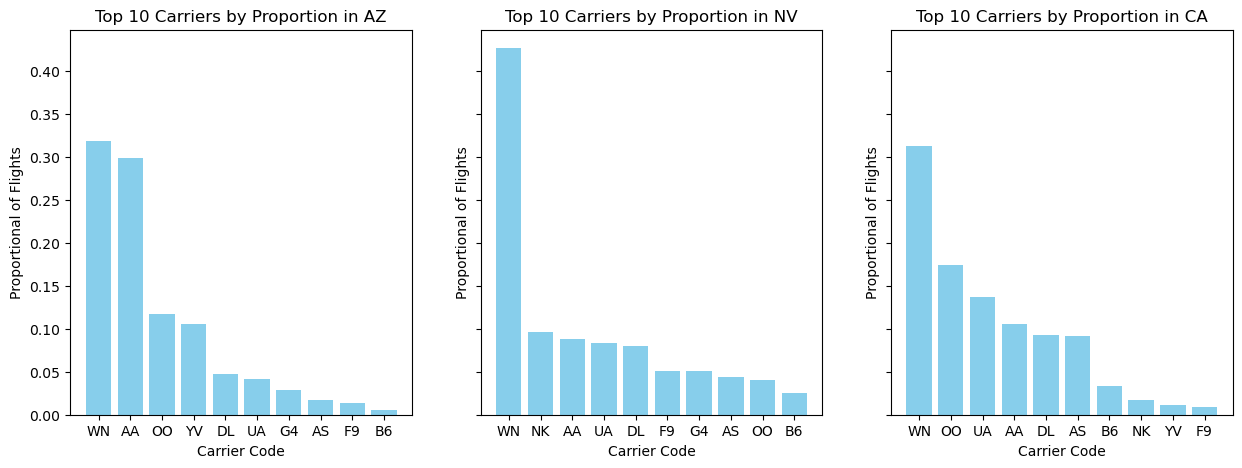

In [24]:
states_to_analyze = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states_to_analyze)]

# Group by origin state and carrier to count the number of flights per carrier
flight_counts = (
    filtered_df_states.groupby(['ORIGIN_ST', 'CARRIER_CODE'], observed=True)
    .size()
    .reset_index(name='num_flights')
)

# Calculate total flights per state
total_flights_per_state = flight_counts.groupby('ORIGIN_ST', observed=True)['num_flights'].sum()

def calculate_proportion(row):
    return row['num_flights'] / float(total_flights_per_state.loc[row['ORIGIN_ST']])

flight_counts['proportion'] = flight_counts.apply(calculate_proportion, axis=1)

top_airlines = flight_counts.groupby('ORIGIN_ST', observed=True)[['CARRIER_CODE','proportion']].apply(
    lambda x: x.nlargest(10, 'proportion')
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, state in enumerate(states_to_analyze):
    state_data = top_airlines[top_airlines['ORIGIN_ST'] == state]
    axes[i].bar(state_data['CARRIER_CODE'], state_data['proportion'], color='skyblue')
    axes[i].set_title(f'Top 10 Carriers by Proportion in {state}')
    axes[i].set_xlabel('Carrier Code')
    axes[i].set_ylabel('Proportional of Flights')

plt.show()

Looking at the results we can see that Southwest Airlines (WN) is the most common carrier in all 3 states. This makes sense because Southwest Airlines' main business is having frequent flights around the southwestern US. An interesting detail is that in Arizona, American Airlines is almost tied with Southwest Airlines in terms of proportion of flights but that it is much further behind in Nevada and California. We see Delta Airlines is present in the middle of the top 10 carriers by proportion for all 3 states. This makes sense because Delta is spread much wider in terms of flights, which will decrease the amount of presence they have in any particular area. Interestingly Sky West Airlines (OO) is very present in Arizona and California, but is much less present in Nevada. Conversly, United Airlines is much more present in California and Nevada but not Arizona. We can see Mesa Airlines (YV) is present in both Arizona and California, but much more so in Arizona. This makes sense Mesa Airlines is a regional carrier based in Phoenix, Arizona. There are some other carriers like Frontier Airlines (F9), Jetblue (B6), and Allegiant (G4) which make up a much smaller proportion of flights in each state.

## Question 4 — (20 points)

Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

## Question 5 — (30 points)

Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

Q5.1: Evaluate which airlines have the best performance in the region.

One way to determine the best performance of an airline would be to determine the average delay time for each flight from that airline. To do so, it makes most sense to create a new column averaging the departure delay and arrival delay to find the overall delay for each flight. From there, I will divide the total time of all delays for an airline by the total number of flights to find the average time each flight is delayed. 

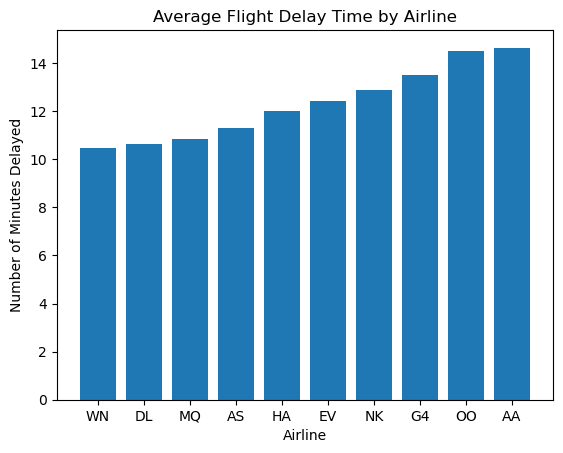

''

In [65]:
# creating new column for overall delay
df['OVERALL_DELAY']=(df['ARR_DELAY']+df['DEP_DELAY'])/2

# grouping df and finding avg overall delay
avg_delay_time = pd.DataFrame(df.groupby('CARRIER_CODE', observed=False)['OVERALL_DELAY'].apply(lambda x: x.sum()/x.count())).sort_values(by='OVERALL_DELAY').head(10).reset_index()
avg_delay_time['AVG_DELAY'] = avg_delay_time['OVERALL_DELAY'] / np.timedelta64(1, 'm')

# display the top ten airlines with the shortest average number of flights
plt.bar(avg_delay_time['CARRIER_CODE'], avg_delay_time['AVG_DELAY'])
plt.ylabel('Number of Minutes Delayed')
plt.xlabel('Airline')
plt.title('Average Flight Delay Time by Airline')
plt.show()
;


Q5.2: Now we will look at the total monthly flight hours for each airline, for the top 10 airlines.

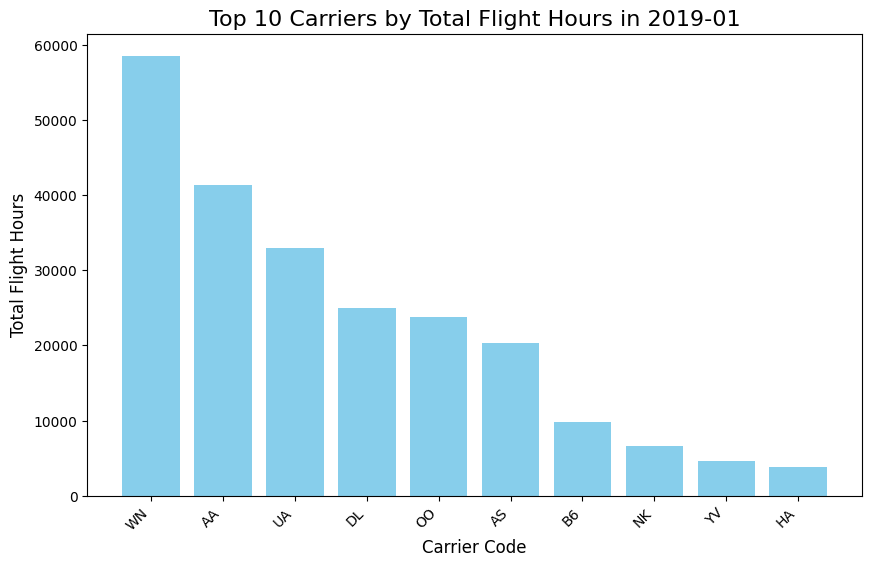

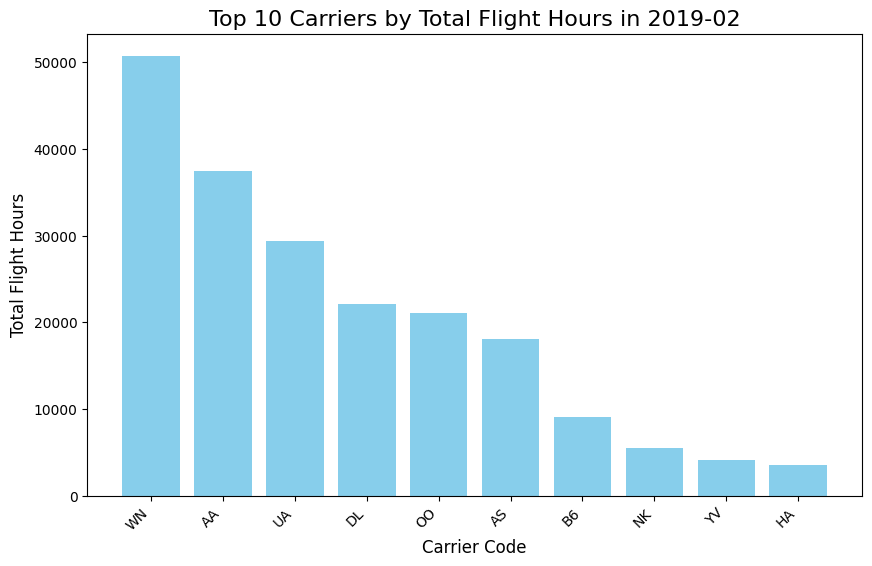

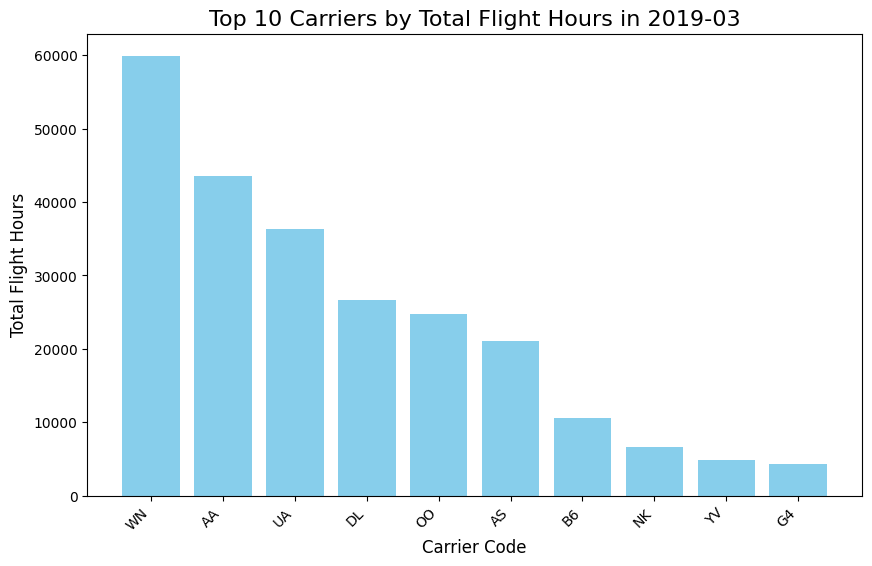

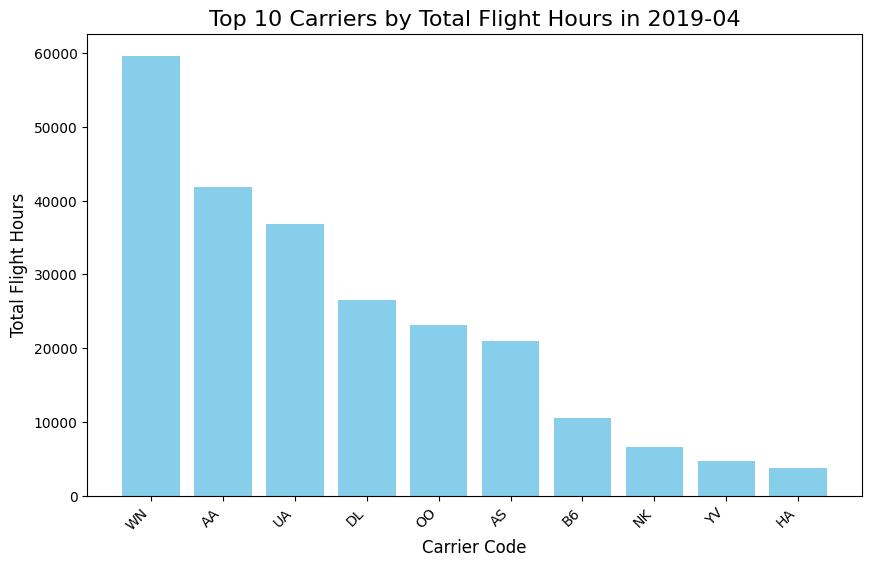

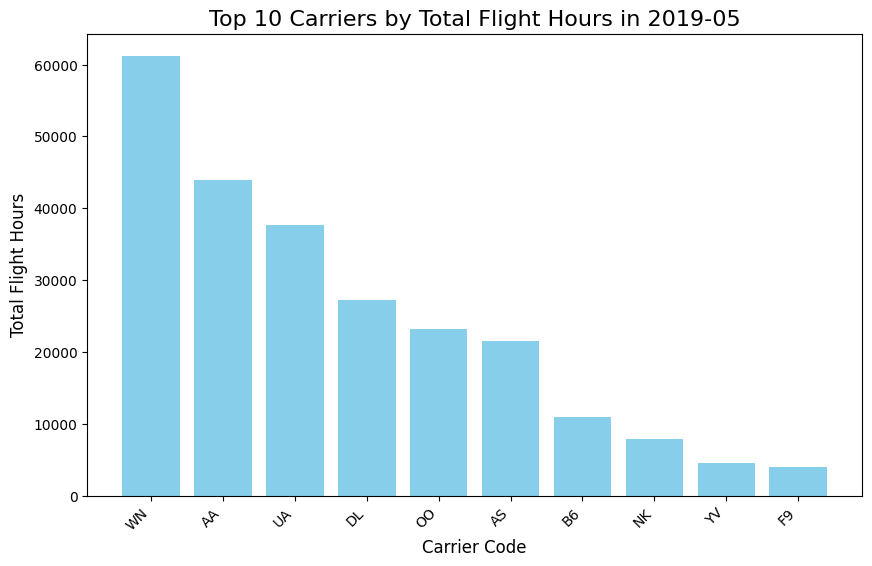

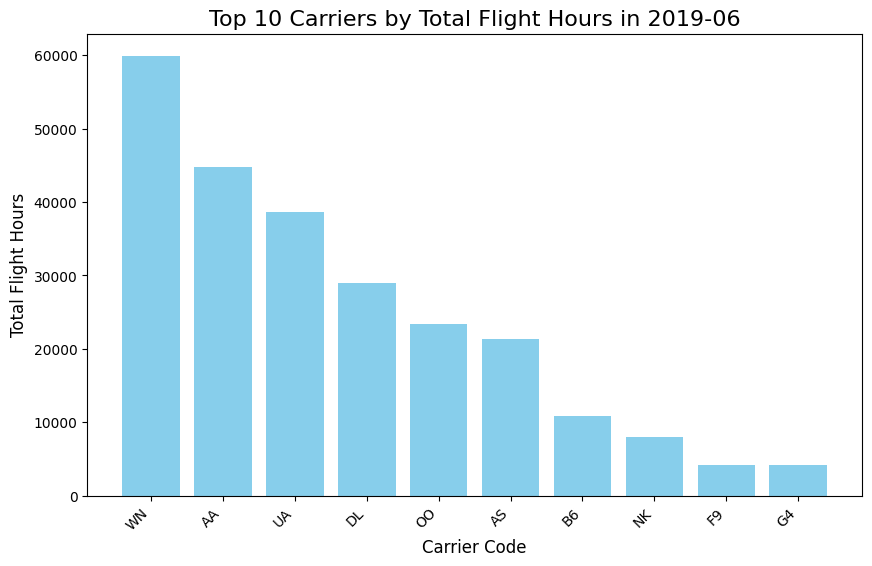

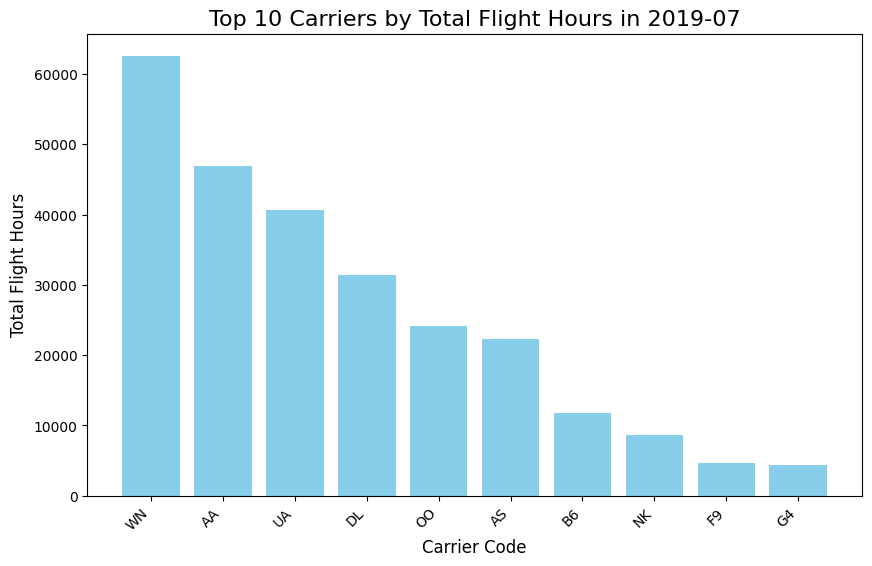

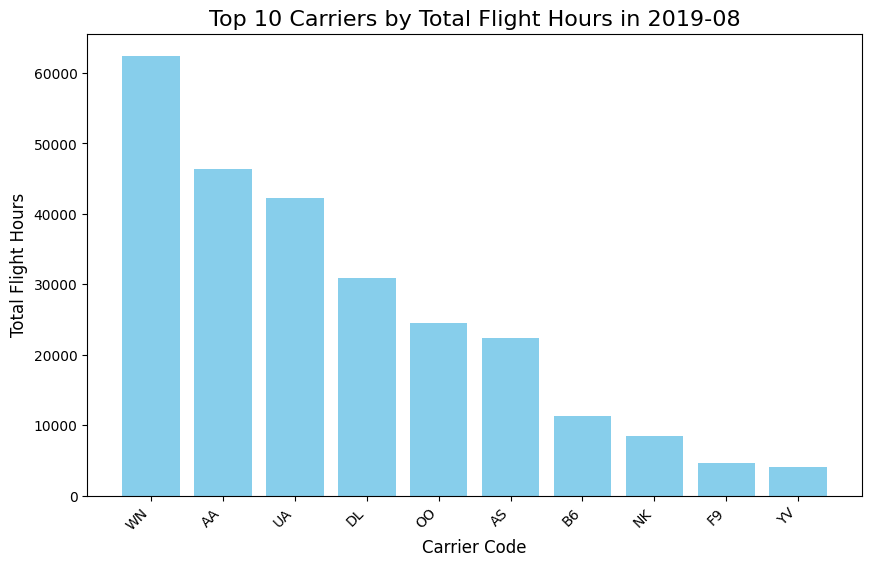

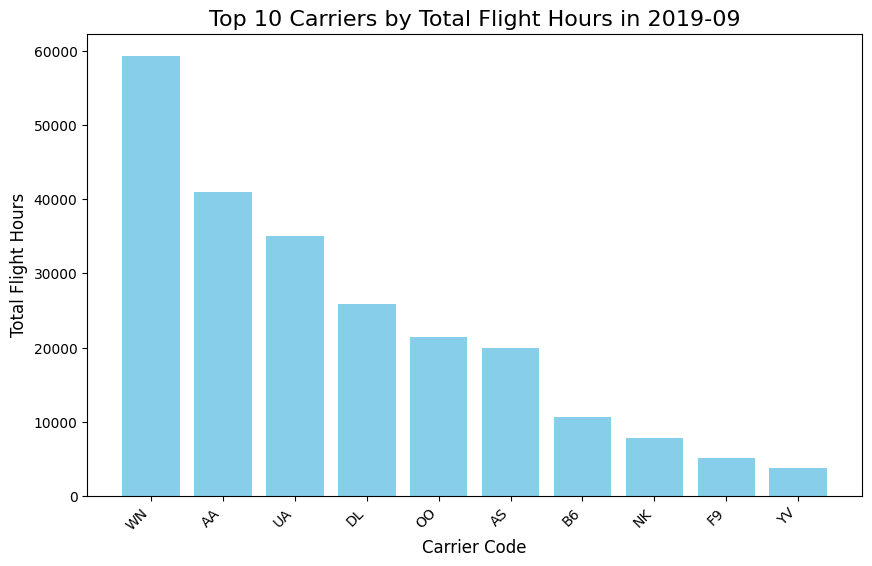

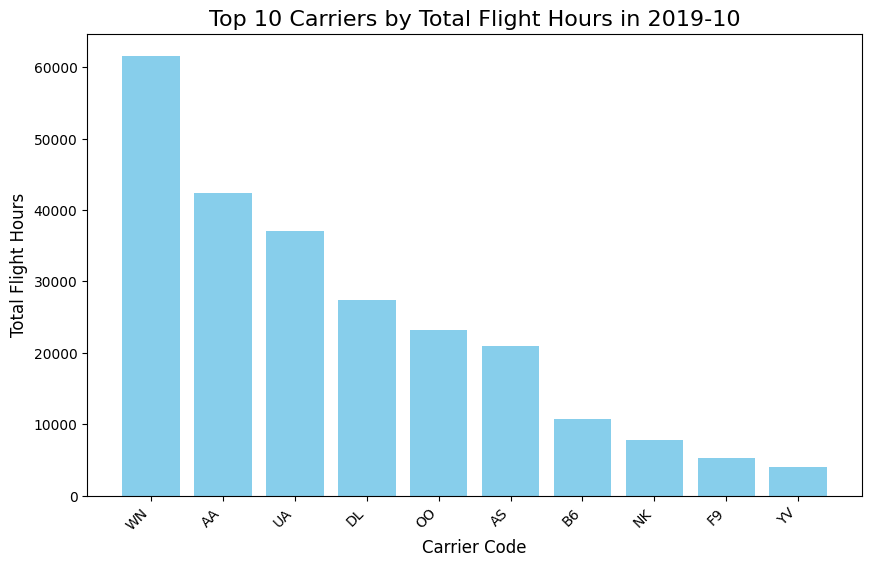

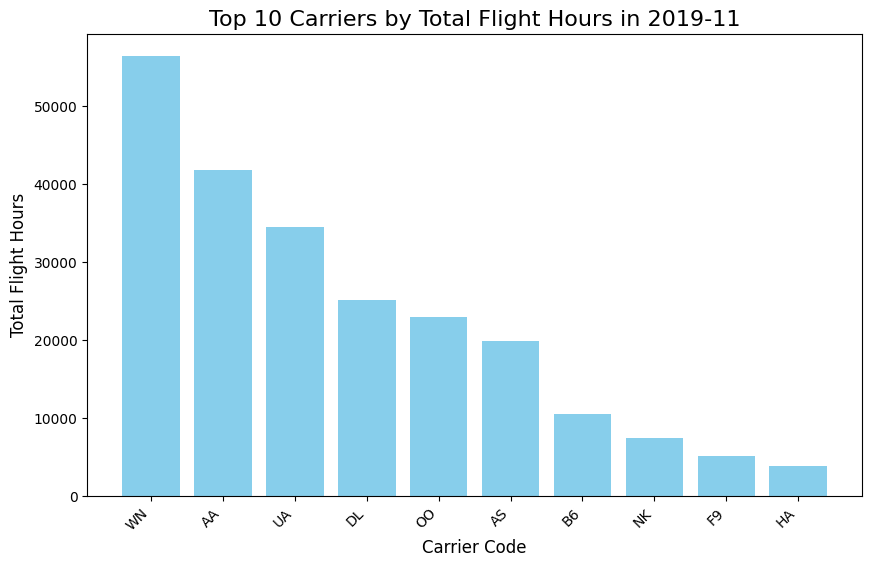

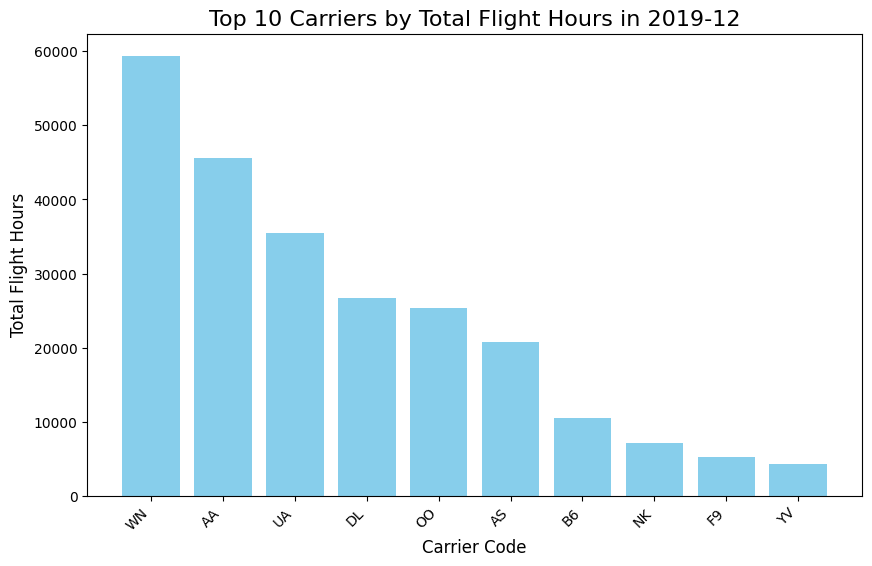

In [42]:
states_to_analyze = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states_to_analyze)]
filtered_df_states = filtered_df_states.copy()
filtered_df_states['YEAR_MONTH'] = filtered_df_states['FL_DATE'].dt.to_period('M')
filtered_df_states['FLIGHT_HOURS'] = filtered_df_states['ELAPSED_TIME'].dt.total_seconds() / 3600

monthly_carrier_hours = filtered_df_states.groupby(['YEAR_MONTH', 'CARRIER_CODE'], observed=True)['FLIGHT_HOURS'].sum().reset_index()

top_carriers_per_month = monthly_carrier_hours.groupby('YEAR_MONTH', observed=True)[['YEAR_MONTH', 'CARRIER_CODE', 'FLIGHT_HOURS']].apply(
    lambda x: x.nlargest(10, 'FLIGHT_HOURS')
).reset_index(drop=True)

months = top_carriers_per_month['YEAR_MONTH'].unique()

for month in months:
    monthly_data = top_carriers_per_month[top_carriers_per_month['YEAR_MONTH'] == month]
    monthly_data = monthly_data.sort_values(by='FLIGHT_HOURS', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_data['CARRIER_CODE'], monthly_data['FLIGHT_HOURS'], color='skyblue')
    plt.title(f'Top 10 Carriers by Total Flight Hours in {month}', fontsize=16)
    plt.xlabel('Carrier Code', fontsize=12)
    plt.ylabel('Total Flight Hours', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

Southwest Airlines (WN) have the most total flight hours every month, followed by American Airlines and United Airlines. This corroborates our findings in Q3 where we found that Southwest Airlines was the top airline by proportion of flights for all 3 states. It makes sense that the carrier with the most flights will have the most flight hours in a particular region. The total flight hours per carrier are extremely consistent across months as well, which makes sense considering the fact that flight scheduling and routes are also very consistent over time. An interesting detail is that in February the total flight hours for Southwest Airlines is lower than usual by about 1000 flight hours.

## Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

Indicate which airline operates the selected aircraft and where it often travels.
Arrival and departure delays at the airports where it traveled.
Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.
 

Question 6 — Summary

Summarize the overall analysis and share THREE (3) key findings.

In [ ]:
# exploring the tail numbers (Max, median, min freq.)
# aggregating the frequencies
tails_counts = df['TAIL_NUM'].value_counts()
max_val = tails_counts.max()
median_val = tails_counts.median()
min_val = tails_counts.min()
x = tails_counts[tails_counts == max_val].index[0]
y = tails_counts[tails_counts == median_val].index[0]
z = tails_counts[tails_counts == min_val].index[0]
print(x+', '+y+', '+z)

# N706SK appears to be the most frequently flying aircraft
# N491UA appears to be at the median
# N821NW appears to be the least

In [ ]:
tails_counts.describe

In [ ]:
# 6.1 Indicate which airline operates the selected aircraft and where it often travels.
# OO carrier code is for skywest, UA for united, and DL for delta airlines
# 5 most often destinations

def tails_analyze(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    print('Carrier code: '+aircraft_info.iloc[0, 1])
    aircraft_freq_dest = aircraft_info['DEST'].value_counts().head(5)
    aircraft_freq_dest.plot(kind='bar', title=tail_num+' most travelled', xlabel='Destination', ylabel='Frequency')

In [ ]:
tails_analyze(x)

In [ ]:
tails_analyze(y)

In [ ]:
tails_analyze(z)

In [ ]:
# 6.2 Arrival and departure delays at the airports where it traveled.

def arr_dep_delay_plot(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    aircraft_freq_dest = aircraft_info['DEST'].value_counts().head(5)
    airports = aircraft_freq_dest.index[:5]

    # get the average arrival and departure delay times for frequented airports
    
    def arr_delay_mean(val):
        airport = aircraft_info.loc[aircraft_info['DEST'] == airports[val]]
        return airport['ARR_DELAY'].mean().total_seconds()/60
    
    def dep_delay_mean(val):
        airport = aircraft_info.loc[aircraft_info['DEST'] == airports[val]]
        return airport['DEP_DELAY'].mean().total_seconds()/60
        
    avg_arrival_delay = [arr_delay_mean(0), arr_delay_mean(1), arr_delay_mean(2), arr_delay_mean(3), arr_delay_mean(4)]
    avg_depart_delay = [dep_delay_mean(0), dep_delay_mean(1), dep_delay_mean(2), dep_delay_mean(3), dep_delay_mean(4)]
        
    x_axis = np.arange(len(airports))
    
    plt.bar(x_axis - 0.2, avg_arrival_delay, 0.4, label='Arr. delays')
    plt.bar(x_axis + 0.2, avg_depart_delay, 0.4, label='Dep. delays')
    
    plt.xticks(x_axis, airports)
    plt.xlabel('Destination')
    plt.ylabel('Arr/Dep Delay Time (min)')
    plt.title(tail_num + ' Airports and Delays')
    plt.legend()
    plt.show()

In [ ]:
arr_dep_delay_plot(x)
arr_dep_delay_plot(y)
arr_dep_delay_plot(z)

In [ ]:
# 6.3 Create summary statistics on the distance traveled.

# summary: max, med/mean, min, range, etc...

def distance_summary(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    max_dist = aircraft_info['DISTANCE'].max()
    mean_dist = aircraft_info['DISTANCE'].mean()
    min_dist = aircraft_info['DISTANCE'].min()
    standev = np.std(aircraft_info['DISTANCE'])
    range_dist = max_dist-min_dist
    print('Summary of '+tail_num+' distance traveled in miles:')
    print('Max: '+str(max_dist)+', mean: '+str(mean_dist)+', min: '+str(min_dist)+', range: '+str(range_dist)+', std: '+str(standev))

In [ ]:
distance_summary(x)
distance_summary(y)
distance_summary(z)

In [ ]:
# 6.4 Analyze all the results in 6.1-6.3 to identify any patterns that are evident. 
# Explain your findings and visualize ALL results.
# Summarize the overall analysis and share THREE (3) key findings.

# I found that the highest frequently flying aircraft would on average travel less in distance versus the less frequently fying aircraft.
# The airline it belonged to was a regional airline (skywest), and it would go between airports in the west (AZ, CA)
# I think this makes sense because it makes many short trips (faster turn around) just in the area.

# There was an interesting point in arrival and departure delays, where they would typically have a higher delay in arrival v. departure
# except for in Vegas and Chicago, where aircraft N491UA (median in flight frequency) would experience a longer delay in departure instead. 
# Whats interesting was how Vegas had the highest avg delay time of 25 min (in the 3 aircrafts analyzed) -- maybe because it's a more
# condensed area.

# It looks like that for that united aircraft (N491UA), it would make more stops around the midwest, but was possibly based in SF.
# As it's possibly a busier hub.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
